#Airline Customer Value Analysis

##Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('/content/drive/MyDrive/python/day 23/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


##Data Pre-Processing

###Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [5]:
nums= ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [6]:
category= ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME','LAST_FLIGHT_DATE']
df[category].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


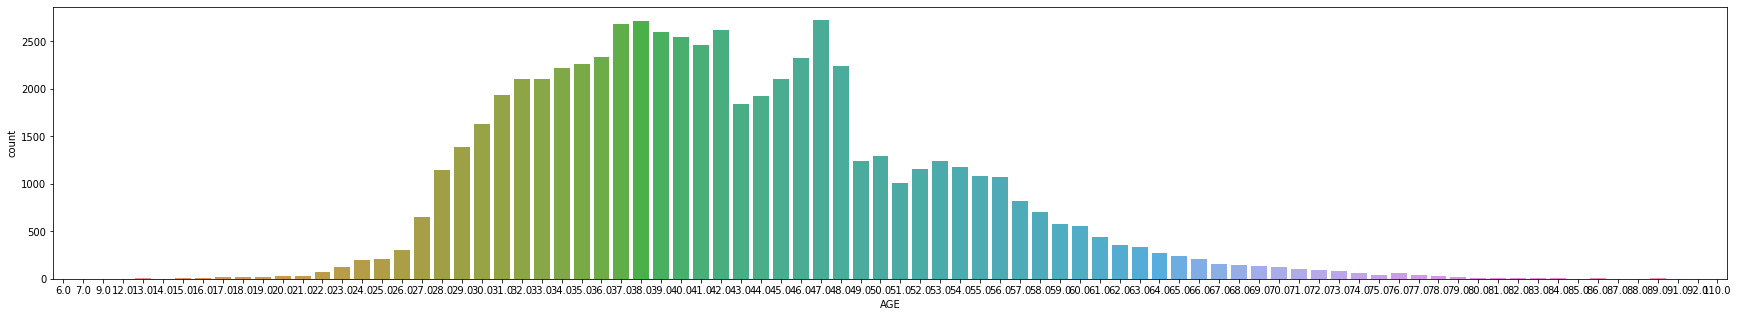

In [7]:
plt.figure(figsize=(30,5))
sns.countplot(x="AGE", data=df)

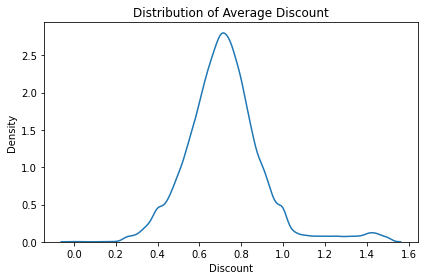

In [8]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

In [9]:
#Drop discount>1
df = df[df['avg_discount']<=1]

###Duplicated Data and Missing Values

Duplicated Data

In [10]:
df.duplicated().sum()

0

Missing Value

In [11]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage
0,WORK_PROVINCE,3019,5.03
1,WORK_CITY,2102,3.50
2,SUM_YR_1,542,0.90
3,AGE,389,0.65
4,SUM_YR_2,134,0.22
5,WORK_COUNTRY,23,0.04


In [12]:
df = df.dropna()

Handling duplicated data and missing values done

###Outliers Handling

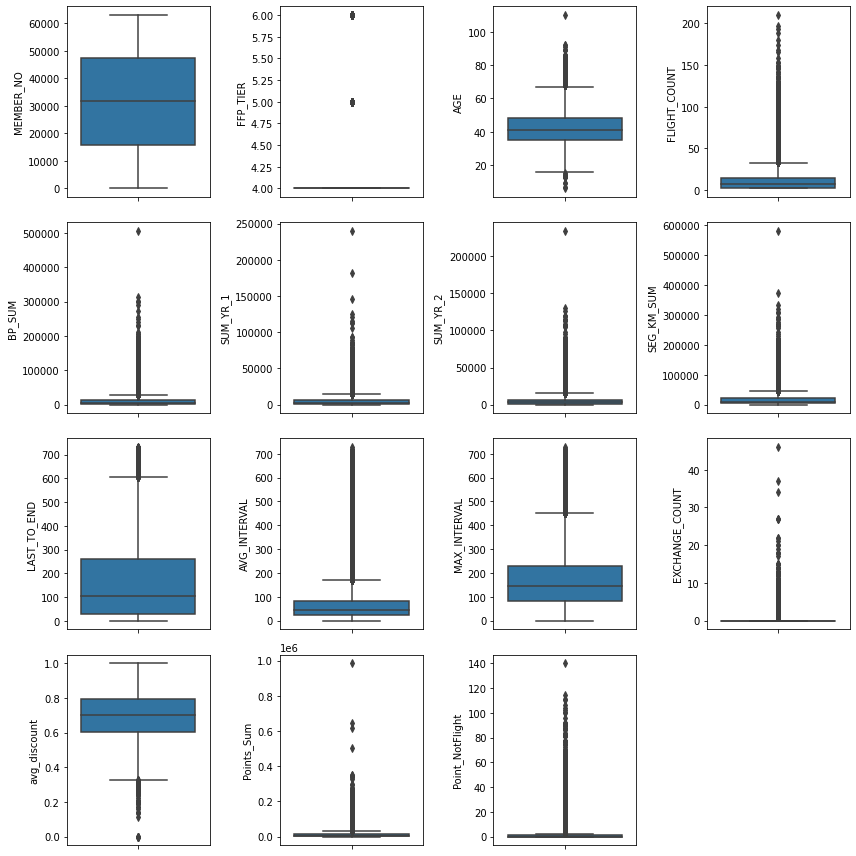

In [13]:
plt.figure(figsize = (12,12))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

###Correlation

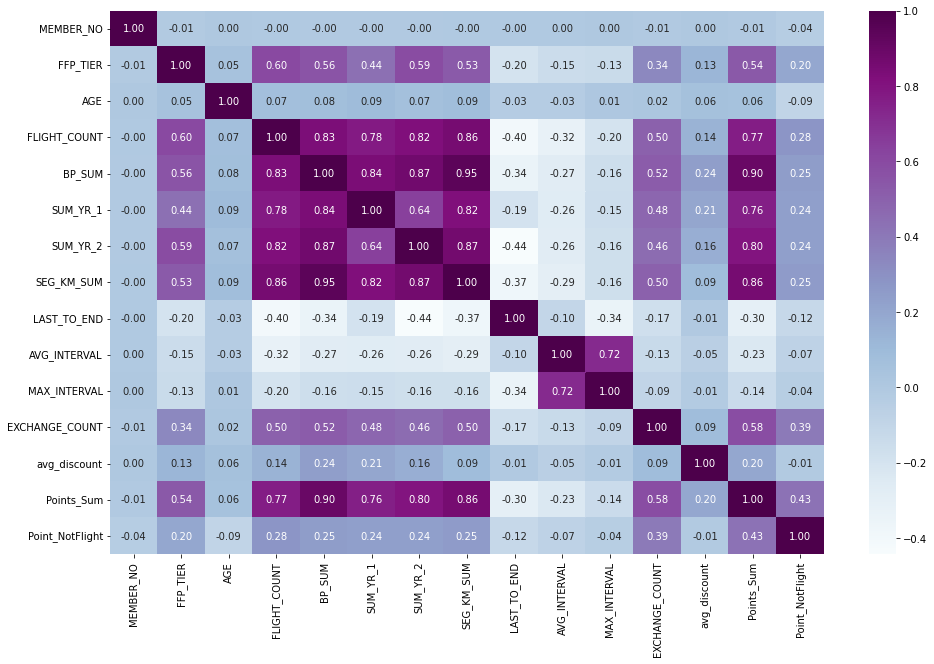

In [14]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")


Largest correlation
*   Point_sum
*   BP_SUM
*   SUM_YR2
*   SUM_YR1
*   FLIGHT_COUNTS
*   SEG_KM_SUM


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55613 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55613 non-null  int64  
 1   FFP_DATE           55613 non-null  object 
 2   FIRST_FLIGHT_DATE  55613 non-null  object 
 3   GENDER             55613 non-null  object 
 4   FFP_TIER           55613 non-null  int64  
 5   WORK_CITY          55613 non-null  object 
 6   WORK_PROVINCE      55613 non-null  object 
 7   WORK_COUNTRY       55613 non-null  object 
 8   AGE                55613 non-null  float64
 9   LOAD_TIME          55613 non-null  object 
 10  FLIGHT_COUNT       55613 non-null  int64  
 11  BP_SUM             55613 non-null  int64  
 12  SUM_YR_1           55613 non-null  float64
 13  SUM_YR_2           55613 non-null  float64
 14  SEG_KM_SUM         55613 non-null  int64  
 15  LAST_FLIGHT_DATE   55613 non-null  object 
 16  LAST_TO_END        556

In [16]:
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

df["FFP_DATE"] = pd.to_datetime(df["FFP_DATE"])
df["LOAD_TIME"] = pd.to_datetime(df["LOAD_TIME"])
df["FIRST_FLIGHT_DATE"] = pd.to_datetime(df["FIRST_FLIGHT_DATE"])
df["LAST_FLIGHT_DATE"] = pd.to_datetime(df["LAST_FLIGHT_DATE"])
df["FFP_DATE"] = df["FFP_DATE"].values.astype('datetime64[ns]')
df["LOAD_TIME"] = df["LOAD_TIME"].values.astype('datetime64[ns]')
df["FIRST_FLIGHT_DATE"] = df["FIRST_FLIGHT_DATE"].values.astype('datetime64[ns]')
df["LAST_FLIGHT_DATE"] = df["LAST_FLIGHT_DATE"].values.astype('datetime64[ns]')

##Feature Selection

**LRFMC on Airline customer**<br>
* L =  LOAD_TIME - FFP_DATE.<br>
the number of months between the time of membership and the end of observation window <br><br>
* R = LAST_TO_END<br>
the number of months from the last time the customer took the company's aircraft to the end of the observation windows <br><br>
* F = FLIGHT_COUNT<br>
number of times the customer takes the company's aircraft in the observation window <br><br>
* M = SEG_KM_SUM<br>
Accumulated flight history of the customer in observation time <br><br>

* C = AVG_DISCOUNT
average value of the discount coefficient corresponding to the passenger space during the observation time 


In [19]:
df = df[(df['SUM_YR_1'].notnull()) & (df['SUM_YR_2'].notnull())]
 
index1 = df['SUM_YR_1'] != 0
index2 = df['SUM_YR_2'] != 0
index3 = (df['SEG_KM_SUM']==0) & (df['avg_discount']==0)
df = df[index1 | index2 | index3]


In [20]:
df = df[['FFP_DATE','LOAD_TIME', 'FLIGHT_COUNT', 'avg_discount', 'SEG_KM_SUM','LAST_TO_END']]
 
# df_LRFMC data
df_LRFMC = pd.DataFrame()
# df_LRFMC.columns = ['L', 'R', 'F','M', 'C']
df_LRFMC['L'] =((df['LOAD_TIME'] - df['FFP_DATE']).dt.days/30)
df_LRFMC['R'] = df['LAST_TO_END']
df_LRFMC['F'] = df['FLIGHT_COUNT']
df_LRFMC['M'] = df['SEG_KM_SUM']
df_LRFMC['C'] = df['avg_discount']

###Duplicated values

In [21]:
df_LRFMC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55376 entries, 0 to 62978
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       55376 non-null  float64
 1   R       55376 non-null  int64  
 2   F       55376 non-null  int64  
 3   M       55376 non-null  int64  
 4   C       55376 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.5 MB


In [23]:
df_LRFMC.duplicated().sum()

80

In [24]:
df_LRFMC = df_LRFMC.drop_duplicates()

###Outliers and Data Standardization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

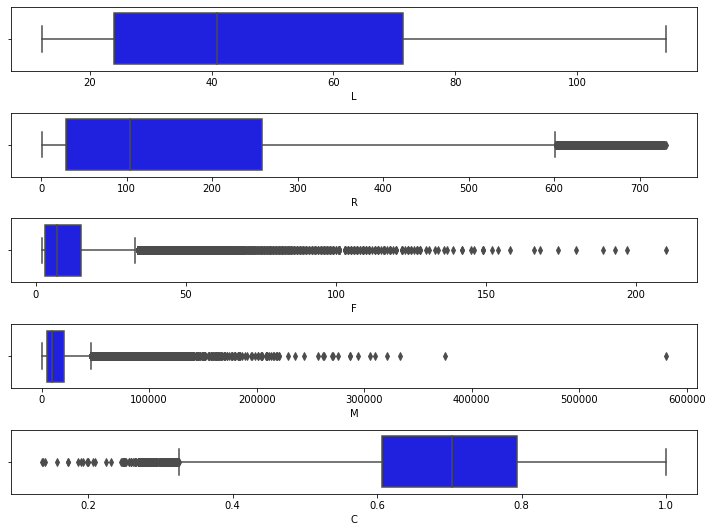

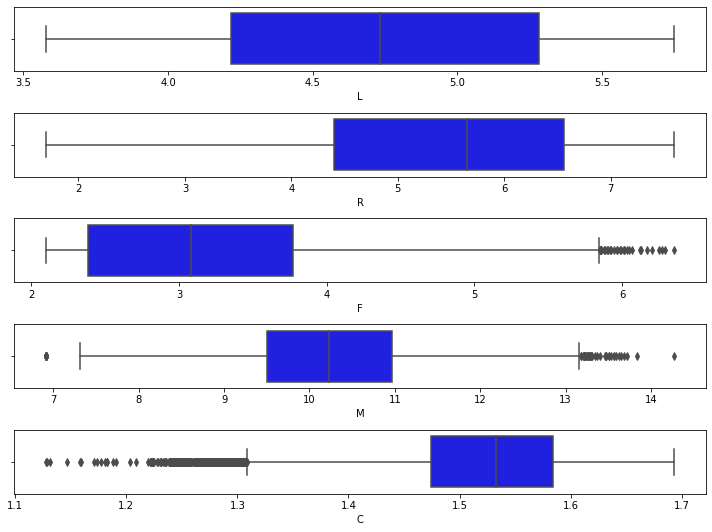

In [26]:
features = list(df_LRFMC)

plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(df_LRFMC[features[i]],orient='h',color='blue')
    plt.tight_layout()   

plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(np.log1p(df_LRFMC[features[i]])+1,orient='h',color='blue')
    plt.tight_layout()

In [27]:
df_LRFMC['L'] = np.log1p(df_LRFMC['L'])
df_LRFMC['R'] = np.log1p(df_LRFMC['R'])
df_LRFMC['F'] = np.log1p(df_LRFMC['F'])
df_LRFMC['M'] = np.log1p(df_LRFMC['M'])
df_LRFMC['C'] = np.log1p(df_LRFMC['C'])

In [29]:
Q1 = df_LRFMC['C'].quantile(0.25)
Q3 = df_LRFMC['C'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_LRFMC['C'] >= low_limit) & (df_LRFMC['C'] <= high_limit))
df_LRFMC = df_LRFMC[filtered_entries]

Q1 = df_LRFMC['F'].quantile(0.25)
Q3 = df_LRFMC['F'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_LRFMC['F'] >= low_limit) & (df_LRFMC['F'] <= high_limit))
df_LRFMC = df_LRFMC[filtered_entries]

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_LRFMC_std = StandardScaler().fit_transform(df_LRFMC)
scaled_df_LRFMC = pd.DataFrame(df_LRFMC_std, columns=list(df_LRFMC))
scaled_df_LRFMC.head(3)

,L,R,F,M,C
0,0.281476,-2.059185,2.603335,3.335603,1.809799
1,0.180904,-1.107366,2.444140,3.603807,0.083753
2,0.010380,-0.858198,1.965123,3.243244,1.977335


##Modelling

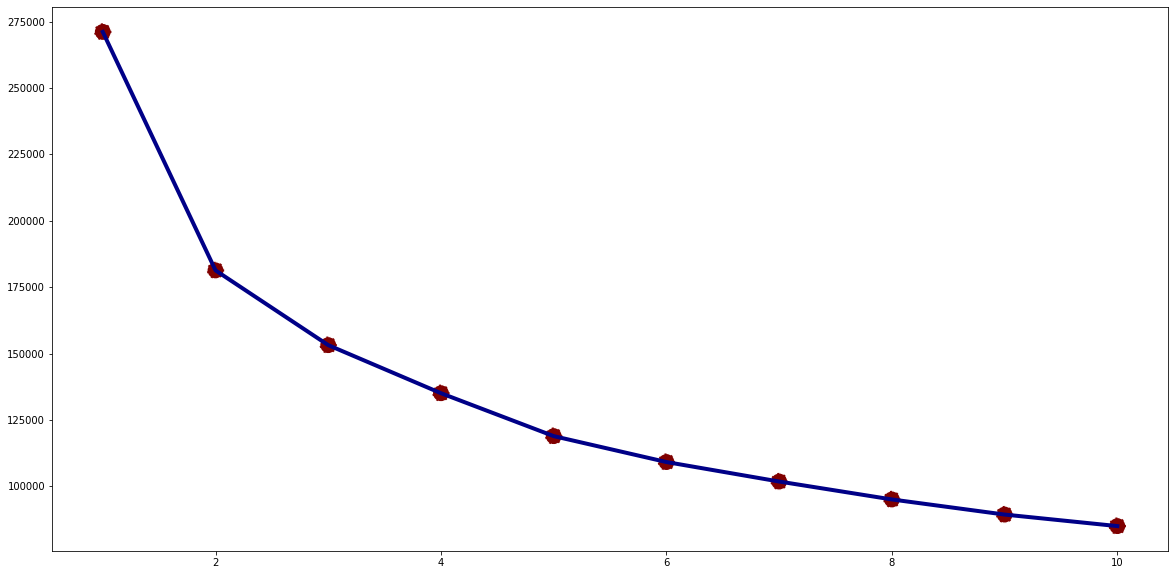

In [31]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df_LRFMC)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_df_LRFMC)

In [33]:
scaled_df_LRFMC['clusters'] = kmeans.labels_
df_LRFMC['clusters'] = kmeans.labels_

In [34]:
df_LRFMC.head()

,L,R,F,M,C,clusters
7,3.899950,1.386294,4.304065,12.568042,0.674000,2
9,3.839452,2.772589,4.174387,12.834881,0.535329,2
10,3.736876,3.135494,3.784190,12.476153,0.687460,2
12,4.505350,4.219508,3.401197,12.680846,0.587302,2
14,3.944167,1.098612,3.931826,12.506429,0.653358,2


##Visualization

Using PCA to make it 2D 

In [35]:
X = scaled_df_LRFMC.drop(['clusters'], axis = 1)
Y = scaled_df_LRFMC['clusters']

In [38]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=5)
pca.fit(X)
pcs = pca.transform(X)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
pdf['clusters'] = Y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,clusters
0,4.750605,-0.951895,-1.239838,-0.272238,0.642479,2
1,4.196121,0.475494,-0.449298,-1.278106,0.747194,2
2,3.687168,-1.207169,-1.373204,-1.071455,0.969860,2
3,3.325270,-0.775144,0.420383,-1.657447,1.324297,2
4,4.525866,-0.741216,-1.027285,0.045098,0.929380,2


In [39]:
pca = PCA(n_components=2)
pca.fit(X)
pcs = pca.transform(X)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
X_std_pca['clusters'] = Y
X_std_pca.head()

,pc1,pc2,clusters
0,4.750605,-0.951895,2
1,4.196121,0.475494,2
2,3.687168,-1.207169,2
3,3.325270,-0.775144,2
4,4.525866,-0.741216,2


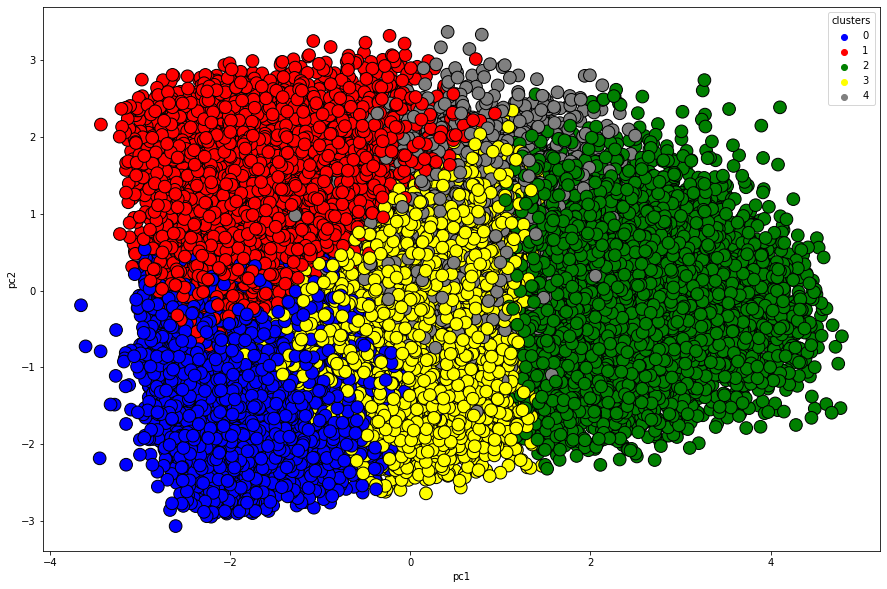

In [41]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="pc1", y="pc2",
    hue="clusters",
    edgecolor='black',
    data=X_std_pca,
    palette=['blue','red','green','yellow','grey'],
    s=160,
    ax=ax
)

##Interpretation and Insight

In [42]:
df_LRFMC['L'] = np.expm1(df_LRFMC['L'])
df_LRFMC['R'] = np.expm1(df_LRFMC['R'])
df_LRFMC['F'] = np.expm1(df_LRFMC['F'])
df_LRFMC['M'] = np.expm1(df_LRFMC['M'])
df_LRFMC['C'] = np.expm1(df_LRFMC['C'])

In [43]:
df_LRFMC.head()

,L,R,F,M,C,clusters
7,48.400000,3.0,73.0,287230.0,0.962070,2
9,45.500000,15.0,64.0,375074.0,0.708010,2
10,40.966667,22.0,43.0,262013.0,0.988658,2
12,89.500000,67.0,29.0,321529.0,0.799127,2
14,50.633333,2.0,50.0,270067.0,0.921985,2


In [44]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
## for Length

def LClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4    
    
## for Coeficient

def CClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [45]:
quartiles = df_LRFMC.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

              L      R     F        M         C  clusters
0.25  24.066667   29.0   3.0   4996.0  0.612401       1.0
0.50  40.933333  104.0   7.0  10303.0  0.706151       2.0
0.75  71.433333  256.0  15.0  21376.0  0.795248       3.0 <class 'pandas.core.frame.DataFrame'>


In [46]:
quartiles=quartiles.to_dict()

In [47]:
df_LRFMC['L_Quartile'] = df_LRFMC['L'].apply(LClass, args=('L',quartiles,))
df_LRFMC['R_Quartile'] = df_LRFMC['R'].apply(RClass, args=('R',quartiles,))
df_LRFMC['F_Quartile'] = df_LRFMC['F'].apply(FMClass, args=('F',quartiles,))
df_LRFMC['M_Quartile'] = df_LRFMC['M'].apply(FMClass, args=('M',quartiles,))
df_LRFMC['C_Quartile'] = df_LRFMC['C'].apply(CClass, args=('C',quartiles,))

In [48]:
df_LRFMC['LRFMCClass'] = df_LRFMC.L_Quartile.map(str) \
                       + df_LRFMC.R_Quartile.map(str) \
                       + df_LRFMC.F_Quartile.map(str) \
                       + df_LRFMC.M_Quartile.map(str) \
                       + df_LRFMC.C_Quartile.map(str)

In [50]:
cluster_distribution = df_LRFMC['clusters'].value_counts().reset_index()
cluster_distribution.columns = ['clusters','number of users']
cluster_distribution

,clusters,number of users
0,3,12249
1,4,11289
2,0,11079
3,2,10366
4,1,9236


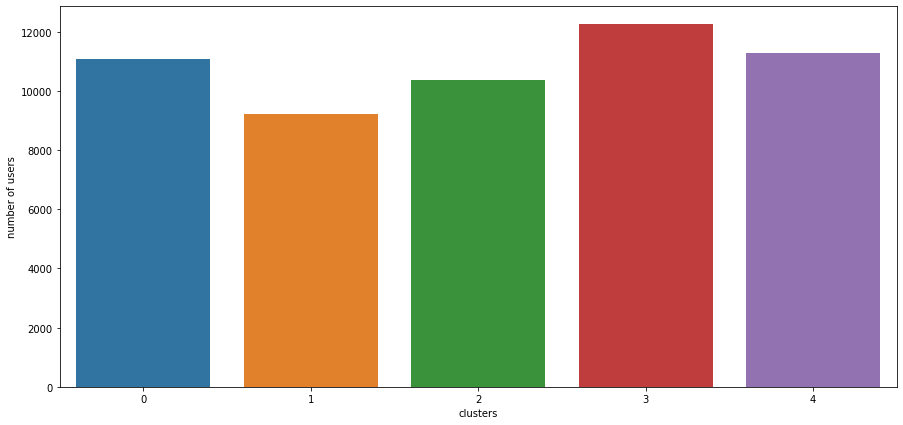

In [52]:
#Cluster Distribution
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'clusters',y='number of users',data=cluster_distribution,ax=ax)

x = np.arange(len(cluster_distribution['clusters']))
y = cluster_distribution['number of users']


In [53]:
df_LRFMC.head(2)

,L,R,F,M,C,clusters,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass
7,48.4,3.0,73.0,287230.0,0.96207,2,3,1,4,4,4,31444
9,45.5,15.0,64.0,375074.0,0.70801,2,3,1,4,4,3,31443


In [54]:
median_cluster = df_LRFMC.groupby('clusters')['L','R','F','M','C'].agg(['median']).reset_index()
median_cluster

<ipython-input-54-4cf3bec3cf71>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  median_cluster = df_LRFMC.groupby('clusters')['L','R','F','M','C'].agg(['median']).reset_index()


,clusters,L,R,F,M,C
,,median,median,median,median,median
0,0,32.100000,303.0,3.0,3877.0,0.814307
1,1,29.833333,235.0,3.0,4886.0,0.530227
2,2,65.683333,15.0,27.0,36879.5,0.729177
3,3,74.333333,113.0,8.0,10744.0,0.697574
4,4,23.400000,56.0,11.0,15896.0,0.704347


In [55]:
median_cluster.columns = ['clusters', 'L','R','F','M','C']

median_cluster['L_Quartile'] = median_cluster['L'].apply(LClass, args=('L',quartiles,))
median_cluster['R_Quartile'] = median_cluster['R'].apply(RClass, args=('R',quartiles,))
median_cluster['F_Quartile'] = median_cluster['F'].apply(FMClass, args=('F',quartiles,))
median_cluster['M_Quartile'] = median_cluster['M'].apply(FMClass, args=('M',quartiles,))
median_cluster['C_Quartile'] = median_cluster['C'].apply(CClass, args=('C',quartiles,))

median_cluster['LRFMCClass'] = median_cluster.L_Quartile.map(str) \
                                + median_cluster.R_Quartile.map(str) \
                                + median_cluster.F_Quartile.map(str) \
                                + median_cluster.M_Quartile.map(str) \
                                + median_cluster.C_Quartile.map(str)

median_cluster

,clusters,L,R,F,M,C,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass
0,0,32.100000,303.0,3.0,3877.0,0.814307,2,4,1,1,4,24114
1,1,29.833333,235.0,3.0,4886.0,0.530227,2,3,1,1,1,23111
2,2,65.683333,15.0,27.0,36879.5,0.729177,3,1,4,4,3,31443
3,3,74.333333,113.0,8.0,10744.0,0.697574,4,3,3,3,2,43332
4,4,23.400000,56.0,11.0,15896.0,0.704347,1,2,3,3,2,12332


In [56]:
r1=pd.Series(kmeans.labels_).value_counts()
r2=pd.DataFrame(kmeans.cluster_centers_)
r3=pd.Series(['Customer Group 1','Customer Group 2','Customer Group 3','Customer Group 4','Customer Group 5',])

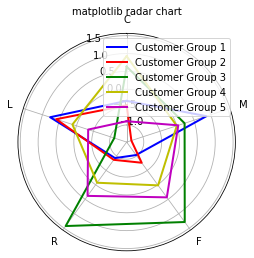

In [57]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=2)
ax.plot(angles, y[1], 'r-', linewidth=2)
ax.plot(angles, y[2], 'g-', linewidth=2)
ax.plot(angles, y[3], 'y-', linewidth=2)
ax.plot(angles, y[4], 'm-', linewidth=2)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)


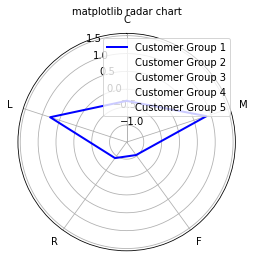

In [58]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=2)
ax.plot(angles, y[1], 'r-', linewidth=0)
ax.plot(angles, y[2], 'g-', linewidth=0)
ax.plot(angles, y[3], 'y-', linewidth=0)
ax.plot(angles, y[4], 'm-', linewidth=0)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)


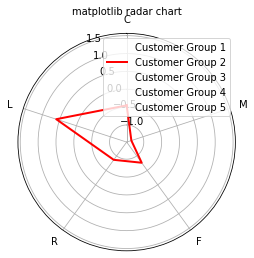

In [59]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=0)
ax.plot(angles, y[1], 'r-', linewidth=2)
ax.plot(angles, y[2], 'g-', linewidth=0)
ax.plot(angles, y[3], 'y-', linewidth=0)
ax.plot(angles, y[4], 'm-', linewidth=0)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)


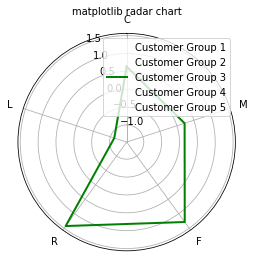

In [60]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=0)
ax.plot(angles, y[1], 'r-', linewidth=0)
ax.plot(angles, y[2], 'g-', linewidth=2)
ax.plot(angles, y[3], 'y-', linewidth=0)
ax.plot(angles, y[4], 'm-', linewidth=0)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)


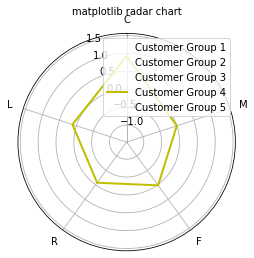

In [61]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=0)
ax.plot(angles, y[1], 'r-', linewidth=0)
ax.plot(angles, y[2], 'g-', linewidth=0)
ax.plot(angles, y[3], 'y-', linewidth=2)
ax.plot(angles, y[4], 'm-', linewidth=0)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)


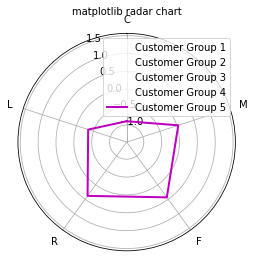

In [62]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=0)
ax.plot(angles, y[1], 'r-', linewidth=0)
ax.plot(angles, y[2], 'g-', linewidth=0)
ax.plot(angles, y[3], 'y-', linewidth=0)
ax.plot(angles, y[4], 'm-', linewidth=2)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)
